In [1]:

import pgeon.policy_graph as PG
from pathlib import Path
from example.environment import SelfDrivingEnvironment
from example.discretizer.discretizer import AVDiscretizer
import pandas as pd
from nuscenes import NuScenes

In [2]:
city = 'boston-seaport'
env = SelfDrivingEnvironment(city)
disc = AVDiscretizer()
    # Generate Policy Graph
    #from existing csv file
    #pg = PG.PolicyGraph.from_nodes_and_edges(str(Path(data_folder) / 'nuscenes_nodes.csv'), str(Path(data_folder) / 'nuscenes_edges.csv'), env, env.discretizer  )

    #from raw data
dtype_dict = {
        'modality': 'category',  # for limited set of modalities, 'category' is efficient
        'scene_token': 'str',  
        'steering_angle': 'float64',  
        'timestamp': 'str',  # To enable datetime operations
        'rotation': 'object',  # Quaternion (lists)
        'x': 'float64',
        'y': 'float64',
        'z': 'float64',
        'yaw': 'float64',  
        'velocity': 'float64',
        'acceleration': 'float64',
        #'heading_change_rate': 'float64',
        'delta_local_x': 'float64',
        'delta_local_y': 'float64'
        #'is_destination': 'str'
    }

df = pd.read_csv(Path('/home/saramontese/Desktop/MasterThesis/example/dataset/data/sets/nuscenes') / "train_v1.0-trainval_lidar_0.csv", dtype=dtype_dict, parse_dates=['timestamp'])
df = df[df['location'] == city]

pg = PG.PolicyGraph(env, disc)

In [3]:
pg = pg.fit(df, update=False, verbose=False)

Fitting PG from scenes...: 100%|██████████| 368/368 [00:21<00:00, 17.25it/s]

Average Reward: 9.210869565217388 and Standard Deviation: 8.242593269661786 --> Epoch Mean Time: 21.33091449737549


In [4]:
pg._save_csv('/home/saramontese/Desktop/MasterThesis/example/dataset/data/policy_graphs/pg_nodes.csv', '/home/saramontese/Desktop/MasterThesis/example/dataset/data/policy_graphs/pg_edges.csv','/home/saramontese/Desktop/MasterThesis/example/dataset/data/policy_graphs/pg_traj.csv')

# TEST AGENTS

In [5]:
greedy_agent = PG.PGBasedPolicy(pg, mode=PG.PGBasedPolicyMode.GREEDY, node_not_found_mode=PG.PGBasedPolicyNodeNotFoundMode.RANDOM_UNIFORM)
stochastic_agent = PG.PGBasedPolicy(pg, mode=PG.PGBasedPolicyMode.STOCHASTIC, node_not_found_mode=PG.PGBasedPolicyNodeNotFoundMode.FIND_SIMILAR_NODES)
random_agent = PG.PGBasedPolicy(pg, mode=PG.PGBasedPolicyMode.STOCHASTIC, node_not_found_mode=PG.PGBasedPolicyNodeNotFoundMode.RANDOM_UNIFORM)

In [17]:
scene_test = df['scene_token'].unique()[8]
example_scene_df = df[df['scene_token']==scene_test][['x','y','velocity', 'yaw_rate', 'acceleration', 'yaw', 'steering_angle']]


---------------------------------
* START TESTING

Actual state: [1794.983244270077, 784.8467499305108, 10.28582141611873, 0.0281303529094718, 0.7209367591044801, -3.1266054498670006, 0.1344623279155325]
Action: Action.BRAKE
Actual state: (1789.8409111419303, 784.7696749654585, 10.64578979567097, 0.584601567540846, 0.7199367591044801, -3.112540273412265, 0.1344623279155325)
Action: Action.GAS
Actual state: (1784.5202624563149, 784.6150539524574, 11.00625817522321, 1.159914998753202, 0.7209367591044801, -2.8202394896418417, 0.1344623279155325)
Action: Action.GAS
Actual state: (1779.2988446604907, 782.8768865392408, 11.36722655477545, 1.7540967822877722, 0.7219367591044801, -2.240281990265241, 0.1344623279155325)
Action: Action.BRAKE
Actual state: (1775.771692264222, 778.4201325791937, 11.727694934327689, 2.3671207824033242, 0.7209367591044801, -1.3632335991213549, 0.1344623279155325)
Action: Action.BRAKE
No nearest states available.
Actual state: (1776.9800878876038, 772.6821462481229, 

/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


* True agent path
               x           y   velocity   yaw_rate  acceleration       yaw  \
763  1794.983244  784.846750  10.285821   0.028130      0.720937 -3.126605   
764  1789.840938  784.801514  10.276810   0.039298     -0.018008 -3.106941   
765  1784.534194  784.665059  10.619949   0.020786      0.686469 -3.096551   
766  1779.288674  784.466955  10.501291   0.009184     -0.237379 -3.091960   
767  1774.144439  784.220848  10.290625   0.004434     -0.420939 -3.089741   
768  1769.073176  784.006542  10.143708  -0.012116     -0.293605 -3.095804   
769  1764.159917  783.830796   9.835536  -0.021574     -0.616515 -3.106588   
770  1759.337691  783.750103   9.627145  -0.035963     -0.415977 -3.124604   
771  1754.882650  783.774015   8.902091  12.515275     -1.448787  3.138740   
772  1750.903650  783.883627   7.963807  -0.045678     -1.877224  3.115909   
773  1747.106417  784.087891   6.925197  -0.045392     -1.891430  3.090983   
774  1744.074351  784.325122   6.091486  -0.03

/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


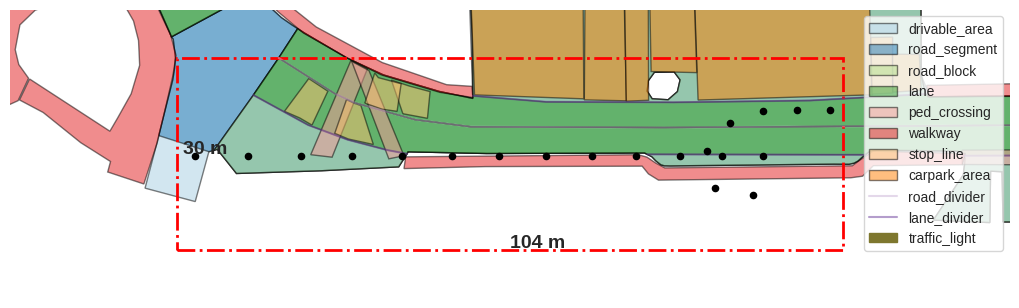

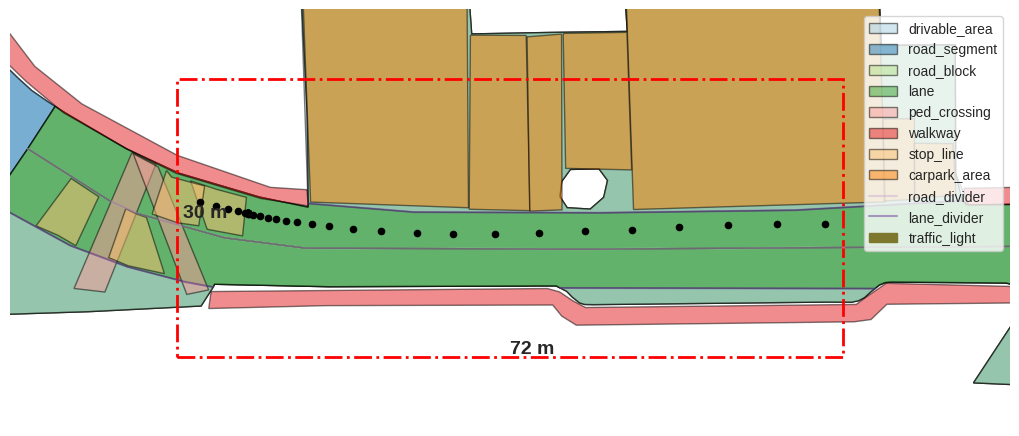

In [18]:
stochastic_agent.test_scene_trajectory(example_scene_df, max_steps=20, render=True, verbose = True)
#diff_aer, diff_std, transferred_learning = stochastic_agent.compare()

---------------------------------
* START TESTING

Actual state: [1687.6719676404955, 918.6576480416252, 6.224075385764276, 0.0231963261159588, -0.2188089732243971, -0.6036358583131319, -0.0610145483078292]
Action: Action.STRAIGHT
Actual state: (1690.2340373315324, 916.891132403373, 6.224075385764276, -0.12372450222127042, 0, -0.5920376952551525, -0.0610145483078292)
Action: Action.GAS
Actual state: (1692.8164225801222, 915.1544502131652, 6.224575385764275, -0.27065713318131757, 0.001, -0.6538999463657877, -0.0610145483078292)
Action: Action.BRAKE
Actual state: (1695.2866999611772, 913.2612876887332, 6.224575385764275, -0.4175897641413647, 0.0, -0.7892285129564465, -0.0610145483078292)
Action: Action.BRAKE
Actual state: (1697.478974044577, 911.0521545948434, 6.224075385764276, -0.5645105924785939, -0.001, -0.9980233950271289, -0.0610145483078292)
Action: Action.BRAKE
Actual state: (1699.165588012487, 908.4367938309773, 6.223075385764275, -0.7114078155701873, -0.002, -1.280278691266426,

/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


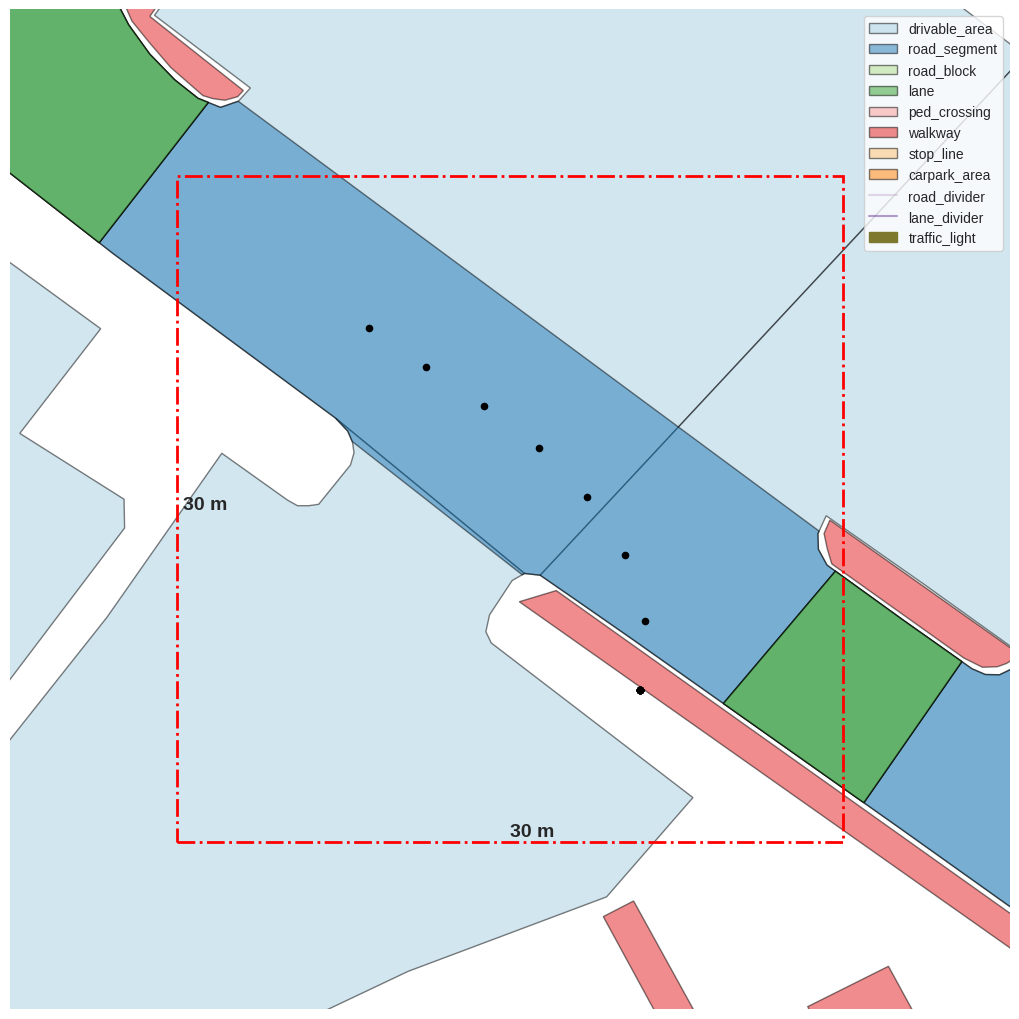

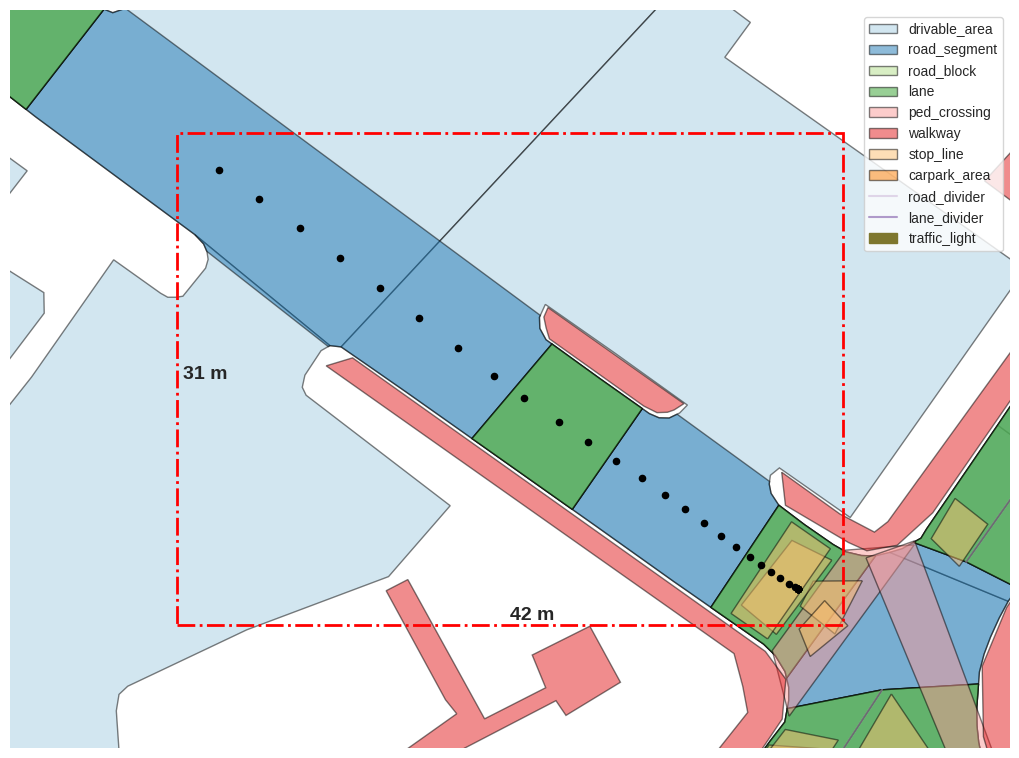

In [14]:
greedy_agent.test_scene_trajectory(example_scene_df, max_steps=20, render=True, verbose = True)
#diff_aer, diff_std, transferred_learning = greedy_agent.compare()

---------------------------------
* START TESTING

Actual state: [1035.734208103835, 1395.5189206081327, 7.296863860811304, 0.022386422341776, 1.6604737776007397, 1.0199908939220852, 0.2164928027592628]
Action: Action.GAS
Actual state: (1037.6437014610938, 1398.627761335701, 8.127600749611673, 0.713105972599449, 1.6614737776007396, 1.031184105092973, 0.2164928027592628)
Action: Action.GAS
Actual state: (1039.7316957163118, 1402.114128137466, 8.958837638412042, 1.4744677194508966, 1.6624737776007394, 1.3877370913926976, 0.2164928027592628)
Action: Action.GAS
Actual state: (1040.5471225801127, 1406.5187021222741, 9.790574527212412, 2.3065141551131667, 1.6634737776007393, 2.124970951118146, 0.2164928027592628)
Action: Action.GAS
Actual state: (1037.97101861336, 1410.6813365940607, 10.622811416012782, 3.2092877718033064, 1.6644737776007392, 3.141592653589793, 0.2164928027592628)
Action: Action.IDLE
Actual state: (1037.97101861336, 1410.6813365940607, 10.622811416012782, 4.112061388493446, 

/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


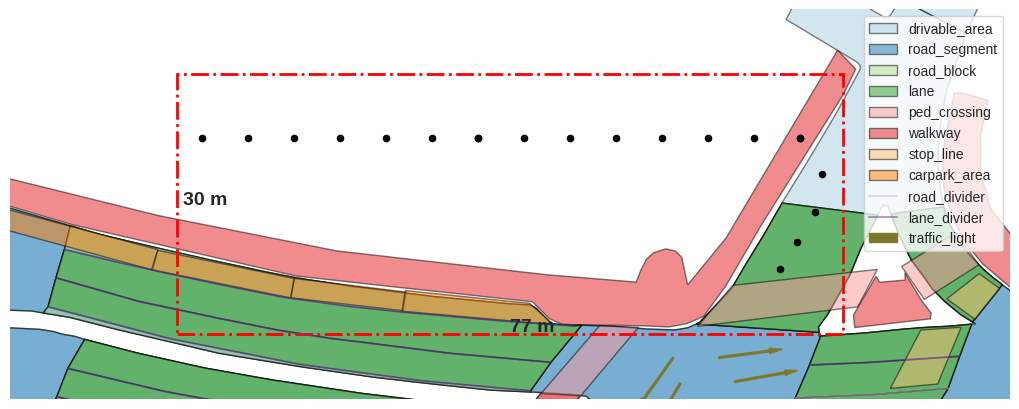

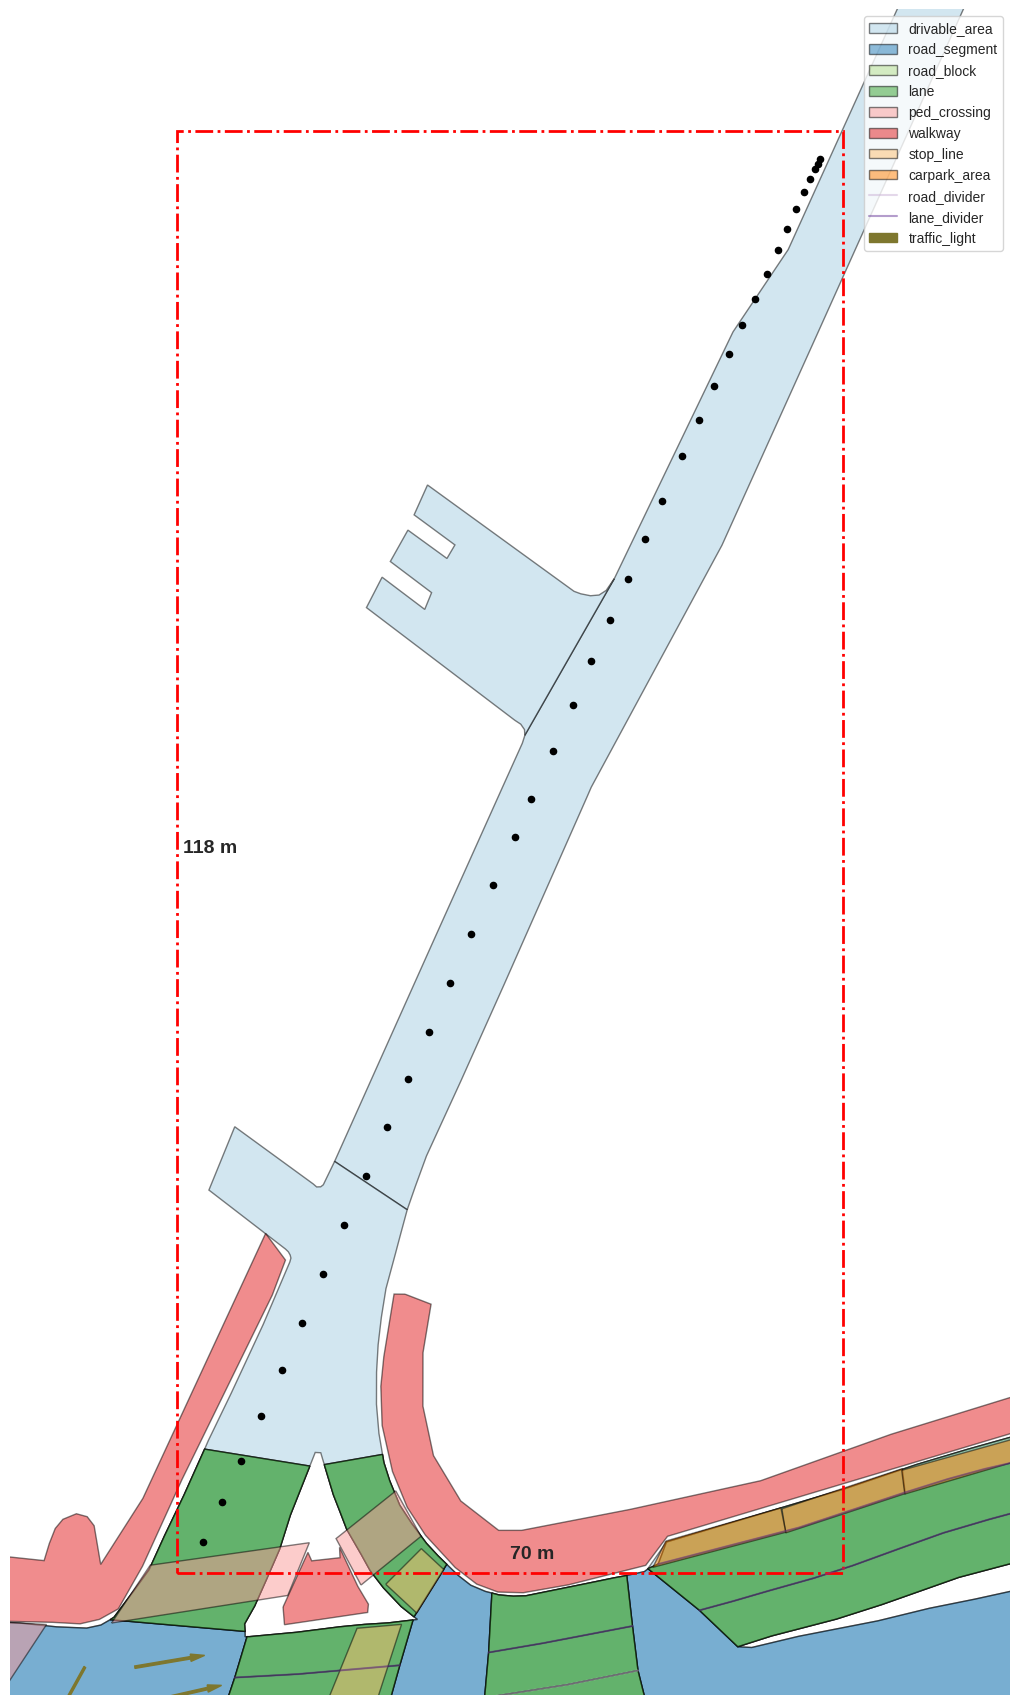

In [9]:
random_agent.test_scene_trajectory(example_scene_df, max_steps=20, render=True, verbose = True)
#diff_aer, diff_std, transferred_learning = random_agent.compare()